In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Defining quadratic loss function
def quadratic_loss(x, y):
    return x**2 + 10 * y**2

In [4]:
# Gradient of loss function
def quadratic_grad(x, y):
    dx = 2 * x
    dy = 20 * y
    return np.array([dx, dy])

In [5]:
# BGD
def batch_gradient_descent(grad_func, eta, epochs, start_point):
    x, y = start_point
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]
    
    for _ in range(epochs):
        grad = grad_func(x, y)
        x -= eta * grad[0]
        y -= eta * grad[1]
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
    
    return np.array(path), losses

In [14]:
# RMSprop
def rmsprop_optimizer(grad_func, eta, beta, epsilon, epochs, start_point):
    x, y = start_point
    Eg2 = np.array([0.0, 0.0])  # Moving average of squared gradients
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]
    
    for _ in range(epochs):
        grad = grad_func(x, y)  # Compute gradients
        Eg2 = beta * Eg2 + (1 - beta) * (grad ** 2) # Update moving average
        
        x -= eta * grad[0] / (np.sqrt(Eg2[0]) + epsilon)    # Update x
        y -= eta * grad[1] / (np.sqrt(Eg2[1]) + epsilon)    # Update y
        
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
        
    return np.array(path), losses

In [15]:
# Visualizing the paths
def plot_paths(function, paths, labels, title):
    X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
    Z = function(X, Y)
    
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='jet')
    
    for path, label in zip(paths, labels):
        plt.plot(path[:, 0], path[:, 1], label=label)
        plt.scatter(path[0, 0], path[0, 1], color='green', label='Start')
        plt.scatter(path[-1, 0], path[-1, 1], color='red', label='End')
    
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [16]:
# Visualization function for losses
def plot_losses(losses, labels, title):
    plt.figure(figsize=(8, 6))
    
    for loss, label in zip(losses, labels):
        plt.plot(loss, label=label)
    
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [26]:
# Params
eta_gd = 0.1 # Learning rate for GD
eta_rmsprop = 0.1    # Learning rate for RMSprop
beta = 0.9  # Decay rate for RMSprop
epsilon = 1e-8  # Small constant for RMSprop
epochs = 100
start_point = (1.5, 1.5)   # Initial point far from the minimum

In [27]:
# Run optimizations
path_gd, losses_gd = batch_gradient_descent(quadratic_grad, eta_gd, epochs, start_point)
path_rmsprop, losses_rmsprop = rmsprop_optimizer(quadratic_grad, eta_rmsprop, beta, epsilon, epochs, start_point)

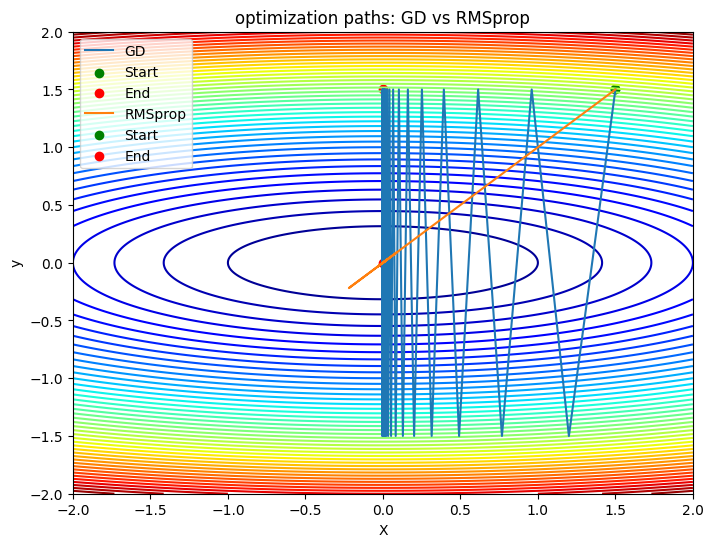

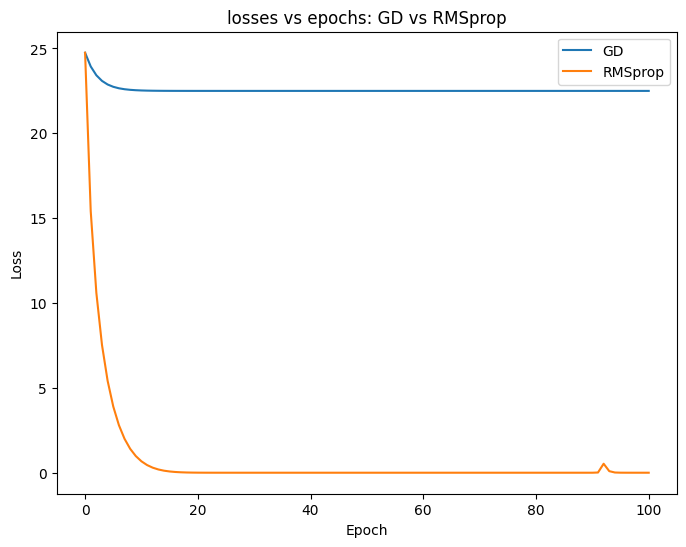

In [28]:
# Plot results
plot_paths(quadratic_loss, [path_gd, path_rmsprop], ["GD", "RMSprop"], "optimization paths: GD vs RMSprop")
plot_losses([losses_gd, losses_rmsprop], ["GD", "RMSprop"], "losses vs epochs: GD vs RMSprop")